# Model v0.3 
Weighted Average Model Used
ML Models 

In [210]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

# import the train test split
from sklearn.model_selection import train_test_split

In [211]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week6


In [212]:
df = pd.read_csv('input_model_weighted_average.csv')
df.head()
df.iloc[168:172]

,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [213]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]


,Year,Period,Value,Discounted_Value
168,2000,JAN,1.97,1.969512
169,2000,FEB,2.03,2.029497
170,2000,MAY,2.20,2.199455
171,2000,JUN,1.89,1.889531


In [214]:
#print (ps)
df['Price'] = price_updated['Value']
df['Discounted_Price'] = price_updated['Discounted_Value']
df['State'] = 'IL'

# Reorder State Column
cols = df.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

df = df.reindex(columns = cols)
df.drop('Unnamed: 0', axis=1, inplace=True)

w_avg_model_scaled = df
w_avg_model_scaled

,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,92.041052,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,91.024753,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,97.288101,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,92.975847,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,98.802348,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [215]:
w_group = w_avg_model_scaled.groupby(["YEAR"])
year_list = w_avg_model_scaled["YEAR"].drop_duplicates()

for year in year_list:
    temp_df = w_group.get_group(year)
    #print(str(year) + ": " +str(len(temp_df["PRICE"].dropna())))

print(w_group.get_group(2000))

    State  YEAR MONTH   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH     DP_AVG  \
168    IL  2000   JAN  60.098523  24.919939  -5.750129  50.876803  18.079444   
169    IL  2000   FEB  53.769218  31.870521   5.378496  44.864486  25.930720   
170    IL  2000   MAY  84.325735  62.360525  37.698853  68.870647  51.653895   
171    IL  2000   JUN  88.622913  69.307943  52.228400  71.995094  60.166479   
172    IL  2000   JUL  87.461845  70.466481  51.066055  74.704992  62.448314   
173    IL  2000   AUG  89.361775  71.781012  56.695409  74.533066  64.284915   
174    IL  2000   SEP  90.167238  63.849101  36.705700  71.408262  52.829779   
175    IL  2000   OCT  81.999760  54.605762  25.520160  62.377842  44.455570   
176    IL  2000   NOV  74.379046  37.371940   9.233327  59.321373  29.790357   
177    IL  2000   DEC  45.127840  19.968293  -7.283182  37.862855  14.533100   

        DP_LOW    HUM_HIGH        ...          VIS_LOW  WIND_HIGH  WIND_AVG  \
168 -19.152746  100.000000        ...   

In [216]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('INDEX', axis=1)

w_avg_model_scaled.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [217]:
# List of column names

col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:27]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]

Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')

Shape of variable data: (370, 24)



In [218]:
input_variables


,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,HUM_AVG,HUM_LOW,SEALVL_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,75.092035,32.839506,30.674052,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,82.286915,39.353377,30.373695,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,65.295138,22.250432,30.590270,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,30.348293,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,62.031159,21.005582,30.474858,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,92.041052,62.081519,22.510682,30.306508,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,91.024753,65.247136,24.452377,30.263593,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,97.288101,63.037696,24.573892,30.342929,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,92.975847,67.471453,23.054672,30.374320,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,98.802348,70.308474,29.572204,30.439866,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [219]:
len(input_variables.PRICE)

370

In [220]:
input_variables.values.T

array([[ 55.95365779,  53.83888596,  77.66845812, ...,  83.40152501,
         76.32358493,  56.49974715],
       [ 27.6172169 ,  28.73111176,  41.93700123, ...,  58.0128482 ,
         44.53455655,  28.02583455],
       [ -2.98092495,   0.3536376 ,  13.92631674, ...,  33.43191377,
         16.50894962,  -5.72401529],
       ..., 
       [  0.        ,   0.65845652,   1.05531265, ...,   3.45209907,
          1.9299919 ,   0.11067628],
       [  2.35      ,   2.38      ,   2.35      , ...,   3.3       ,
          3.32      ,   3.47      ],
       [  2.34941734,   2.37940991,   2.34941734, ...,   3.2991818 ,
          3.31917684,   3.46913965]])

# Linear Regression

# Visualizing the important characteristics¶

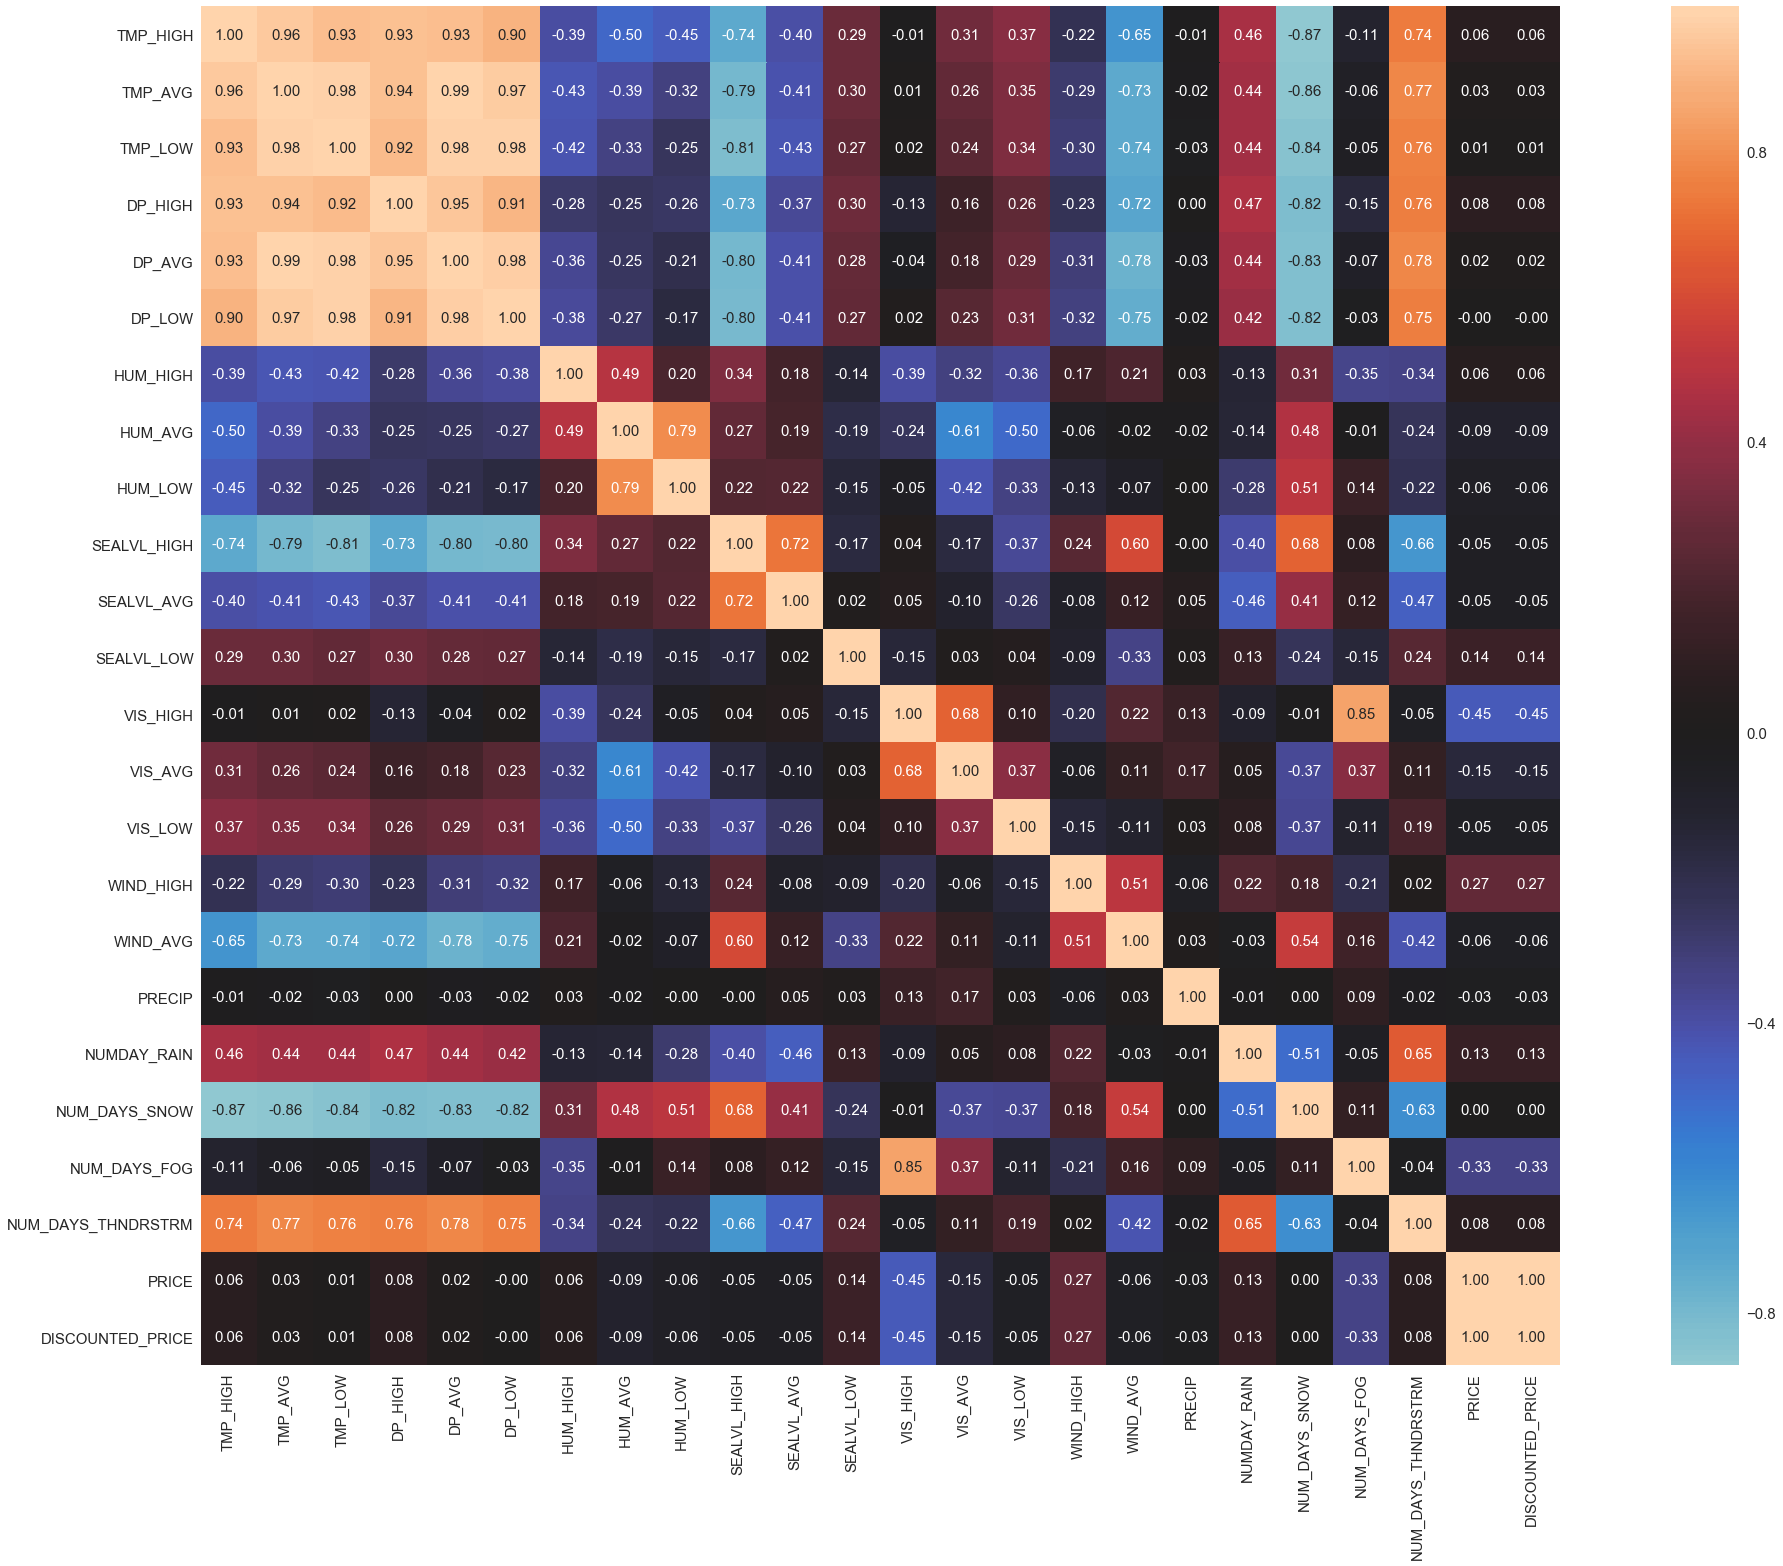

In [221]:
# Plot the correlation matrix 
correlation_matrix = np.corrcoef(input_variables.values.T)
heat_map_column_names = col_names = list(input_variables)
sns.set(font_scale = 1.5)
plt.figure(figsize = (40,25))
hm = sns.heatmap(correlation_matrix,
    cbar=True,
    annot=True,
    center = 0,             
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=heat_map_column_names,
    xticklabels=heat_map_column_names)
plt.show()


In [222]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(296, 22) (296,)
(74, 22) (74,)


# Simple Linear Regression

In [223]:
# regression libraries
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_{}: ".format(lr.coef_))
print("\n" + "lr_intercept_{}".format(lr.intercept_))

lr.coef_[  3.39129612e-02  -2.58779996e-02   4.53556445e-02  -9.51376699e-03
  -5.66029206e-04  -2.57414404e-02  -3.73175375e-02  -7.82866171e-02
   5.66003255e-02  -7.78905001e-01   3.25584707e-02   7.21342047e-02
  -4.62827911e-01   6.15104596e-01  -5.29100856e-01   2.80067271e-02
  -1.47878659e-02   1.23494877e-07   8.60857254e-02   1.24862725e-01
   1.43245098e-01  -1.14412786e-01]: 

lr_intercept_28.1407588331434


In [224]:
# Train and Test Performance
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))

# Store Result and Model Name
model_results.append(lr.score(X_test,y_test))
model_name.append("Linear")

Training set score: 0.385981
Test set score: 0.410852


# Ridge Regression

In [225]:
# Coefficients should be close to zero

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge.score(X_test,y_test))
model_name.append("Ridge")

Training set score: 0.39
Test set score: 0.41


In [226]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_train, y_train)))
print("Test_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_test, y_test)))
print("\n")

# Store Result and Model Name
model_results.append(ridge_01.score(X_test,y_test))
model_name.append("Ridge_0.1")

ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training_ridge_10 set score: {:.2f}".format(ridge_10.score(X_train, y_train)))
print("Test_ridge_10 set score: {:.2f}".format(ridge_10.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge_10.score(X_test,y_test))
model_name.append("Ridge_10")

Training_ridge_0.1 set score: 0.39
Test_ridge_0.1 set score: 0.41


Training_ridge_10 set score: 0.38
Test_ridge_10 set score: 0.41


# Lasso Regression

In [227]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso.score(X_test,y_test))
model_name.append("Lasso")

Training set score: 0.17
Test set score: 0.13
Number of features used: 4


In [228]:
# Setting alpha too low will remove the effect of regularization

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso0001.score(X_test,y_test))
model_name.append("Lasso_0.001")

Training set score: 0.39
Test set score: 0.41
Number of features used: 21


# Elastic Net


In [229]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(enet.coef_ != 0)))

# Store Result and Model Name
model_results.append(enet.score(X_test,y_test))
model_name.append("Elastic Net")

Training set score: 0.34
Test set score: 0.38
Number of features used: 12


In [230]:
# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)
# print("Accuracy: %f"%r2_score(y_test,y_pred))

# # Store Result and Model Name
# model_results.append(r2_score(y_test,y_pred))
# model_name.append("MLR")

# Decision Tree

In [231]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Decision Tree: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("DT")

Accuracy of Decision Tree: 0.236279


# Random Forest

In [232]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_10: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_10")

Accuracy of Random Forest_10: 0.602647


In [233]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_100: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_100")

Accuracy of Random Forest_100: 0.649231


In [234]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forrest_300: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_300")

Accuracy of Random Forrest_300: 0.641387


# Plot Results of Regression Models

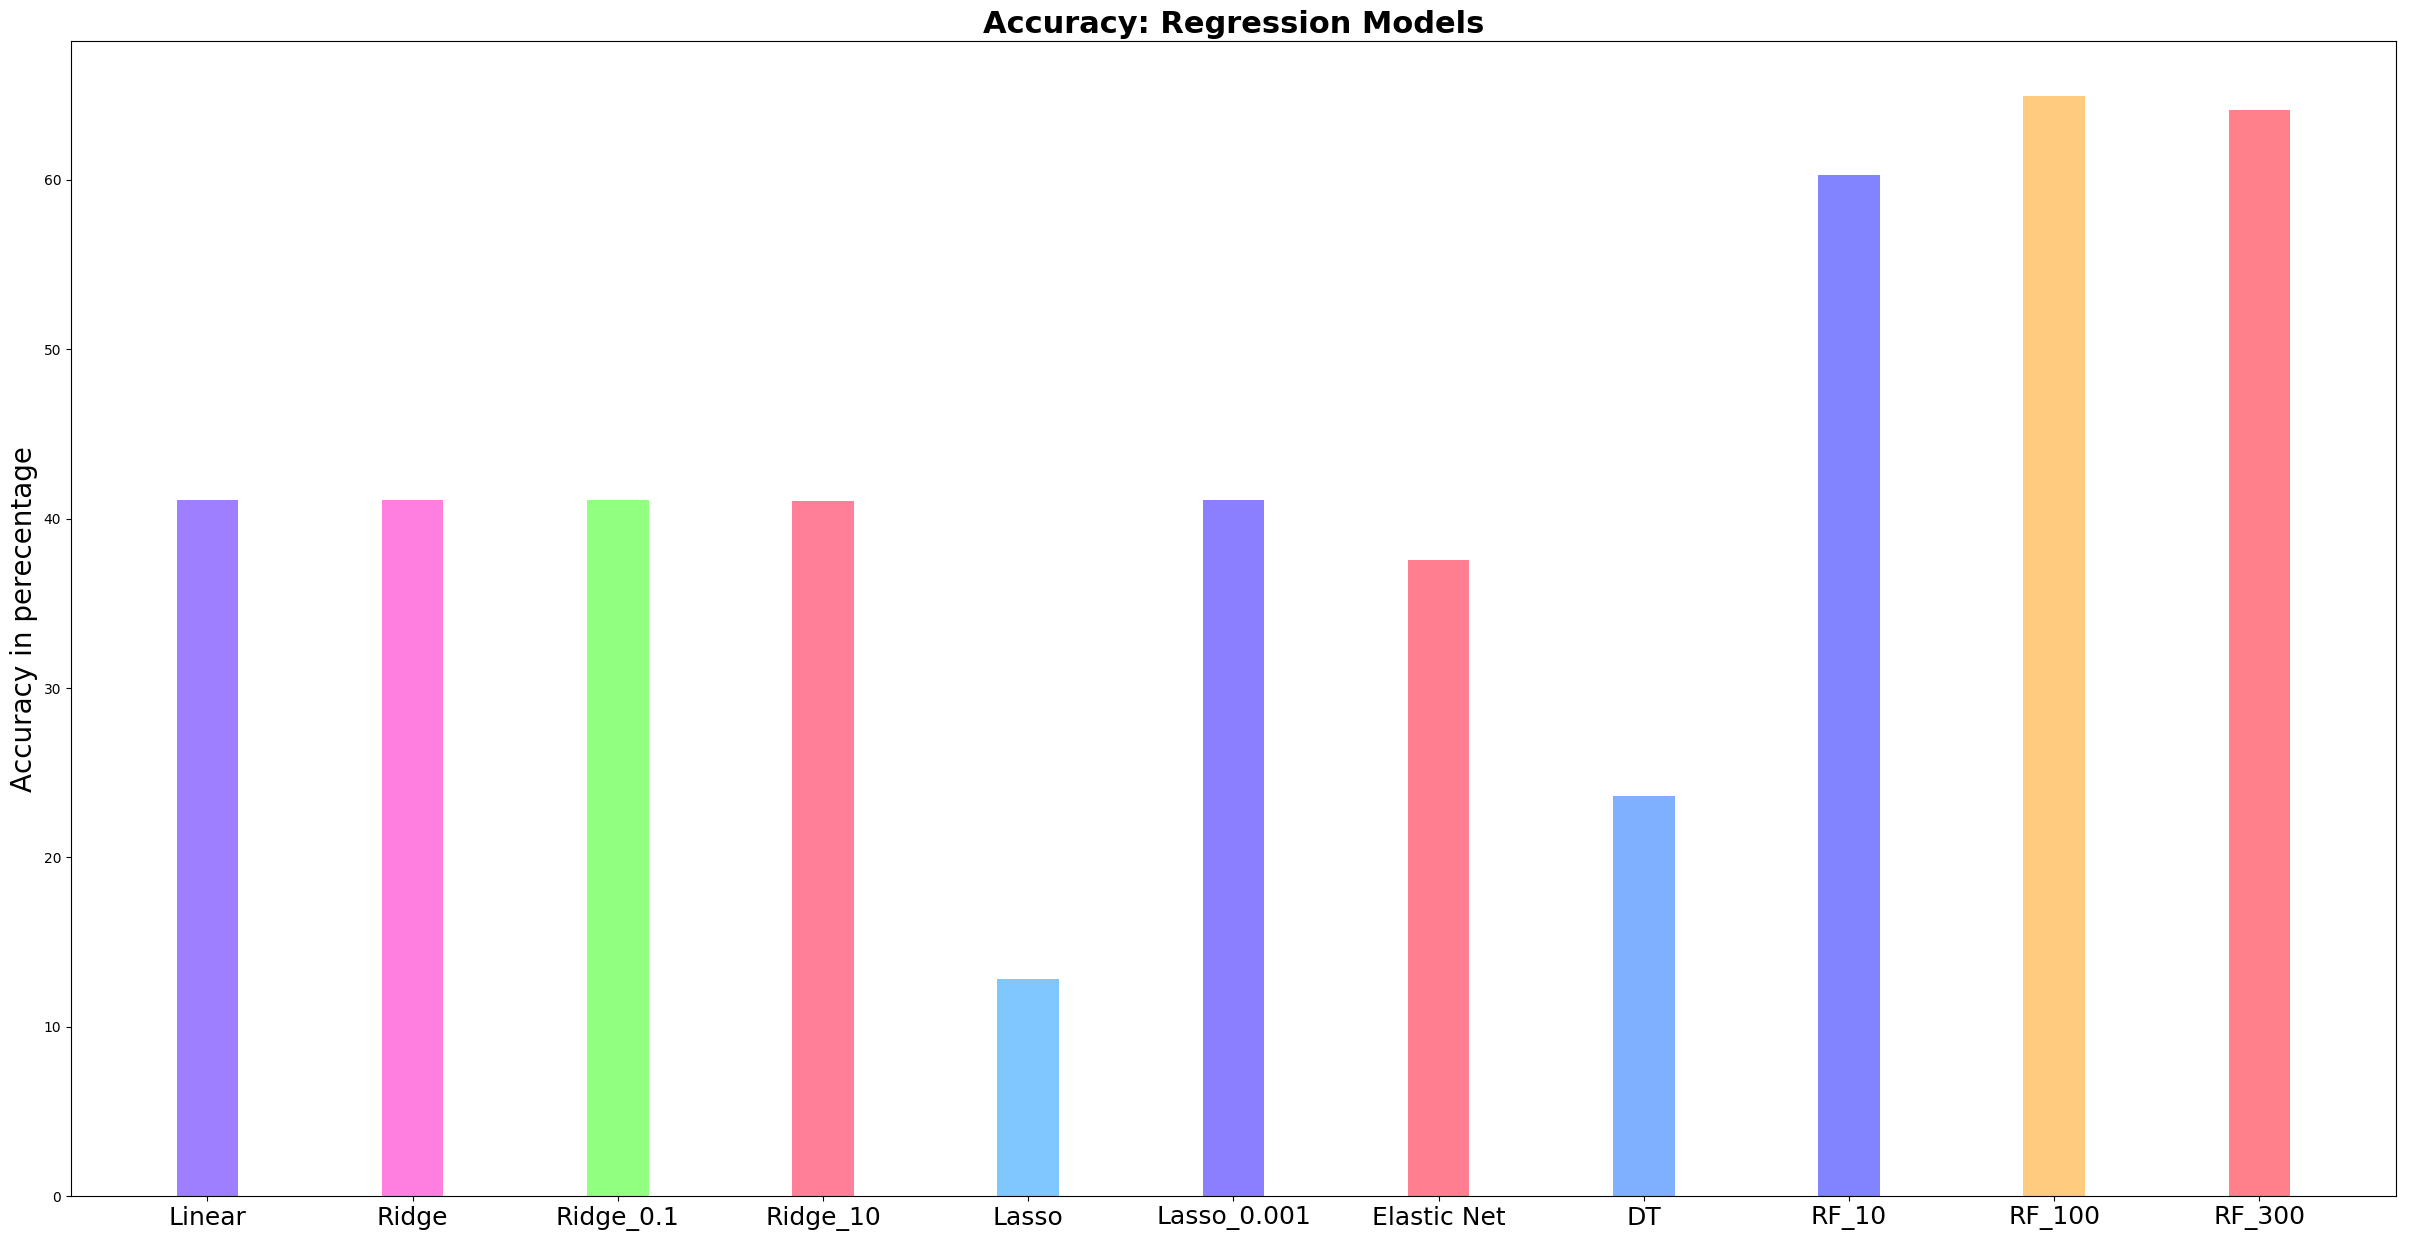

In [235]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.3, color = colors)
plt.xticks(y_pos, model_name, fontsize = 18)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Regression Models', fontsize=22, fontweight='bold')
plt.show()